In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def plot_training(path):
    df = pd.read_csv(path)

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Loss curves
    ax1.plot(df["epoch"], df["train_loss"], label="Train Loss", color="tab:blue", marker='o')
    ax1.plot(df["epoch"], df["val_loss"], label="Validation Loss", color="tab:orange", marker='s')
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Learning rate on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(df["epoch"], df["val_acc"], color="tab:green", linestyle='--', label="Validation Accuracy")
    ax2.set_ylabel("Validation Accuracy")
    ax2.legend(loc="upper left")
    

    plt.title("Training/Validation Loss and Validation Accuracy")
    plt.tight_layout()
    plt.show()

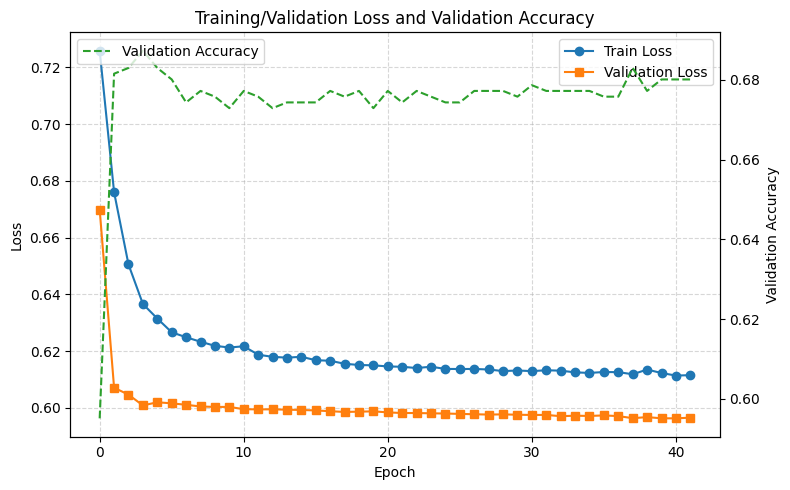

In [ ]:
path_to_csv = "training_log_4103ede6-adb5-11f0-a5cb-fb4fc218edf0.csv"
plot_training(path_to_csv)